## DynamicEarthnet Challenge

### Sentitnel 2 Costa Rica

In [3]:
ls imagery/dynearthnet/2196_3885_13/

2196_3885_13_2018_01.tif
2196_3885_13_2018_02.tif
2196_3885_13_2018_03.tif
2196_3885_13_2018_04.tif
2196_3885_13_2018_05.tif
2196_3885_13_2018_06.tif
2196_3885_13_2018_07.tif
2196_3885_13_2018_08.tif
2196_3885_13_2018_09.tif
2196_3885_13_2018_10.tif
2196_3885_13_2018_11.tif
2196_3885_13_2018_12.tif
2196_3885_13_2019_01.tif
2196_3885_13_2019_02.tif
2196_3885_13_2019_03.tif
2196_3885_13_2019_04.tif
2196_3885_13_2019_05.tif
2196_3885_13_2019_06.tif
2196_3885_13_2019_07.tif
2196_3885_13_2019_08.tif
2196_3885_13_2019_09.tif
2196_3885_13_2019_10.tif
2196_3885_13_2019_11.tif
2196_3885_13_2019_12.tif
MAD_2196_3885_13_2018_01-2196_3885_13_2018_02.tif
MAD_2196_3885_13_2018_01-2196_3885_13_2018_02.tif.aux.xml
MAD_2196_3885_13_2018_01-2196_3885_13_2018_02_cmap.tif
MAD_2196_3885_13_2018_01-2196_3885_13_2018_02_cmap_em.tif
MAD_2196_3885_13_2018_01-2196_3885_13_2018_02_em.tif


### Firts two images

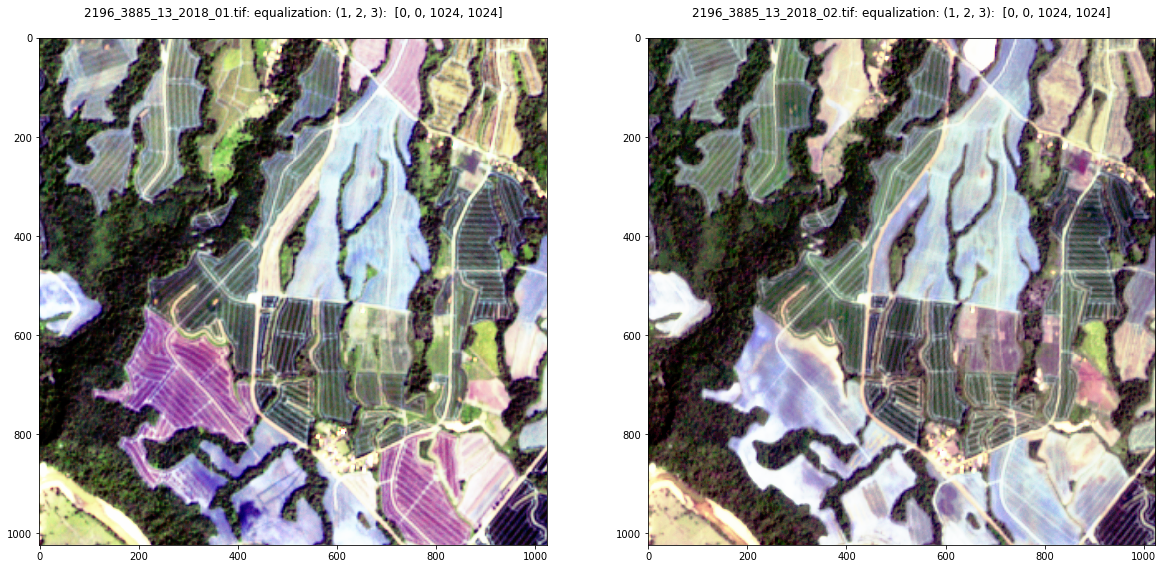

In [4]:
%run scripts/dispms -f imagery/dynearthnet/2196_3885_13/2196_3885_13_2018_01.tif  -e 4 -p [1,2,3] \
-F imagery/dynearthnet/2196_3885_13/2196_3885_13_2018_02.tif -E 4 -P [1,2,3]

### Run iMAD on all 10 bands

------------IRMAD -------------
Sun Mar 14 11:59:17 2021
first scene:  imagery/dynearthnet/2196_3885_13/2196_3885_13_2018_01.tif
second scene: imagery/dynearthnet/2196_3885_13/2196_3885_13_2018_02.tif
rho: [0.99954987 0.99651253 0.96658373 0.94348502 0.91705704 0.87111521
 0.84506887 0.68868846 0.55183017 0.50911123]
result written to: imagery/dynearthnet/2196_3885_13/MAD_2196_3885_13_2018_01-2196_3885_13_2018_02.tif
elapsed time: 94.52360987663269


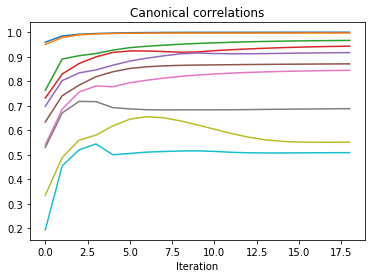

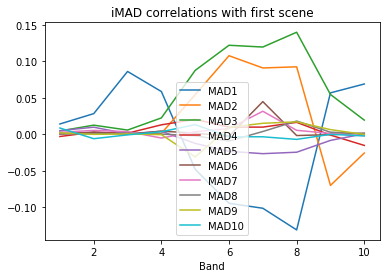

In [17]:
%run scripts/iMad  imagery/dynearthnet/2196_3885_13/2196_3885_13_2018_01.tif \
imagery/dynearthnet/2196_3885_13/2196_3885_13_2018_02.tif

### Threshold change at 0.0001

In [18]:
%run scripts/iMadmap imagery/dynearthnet/2196_3885_13/MAD_2196_3885_13_2018_01-2196_3885_13_2018_02.tif 0.0001

change map written to: imagery/dynearthnet/2196_3885_13/MAD_2196_3885_13_2018_01-2196_3885_13_2018_02_cmap.tif


### Display first 3 MAD bands

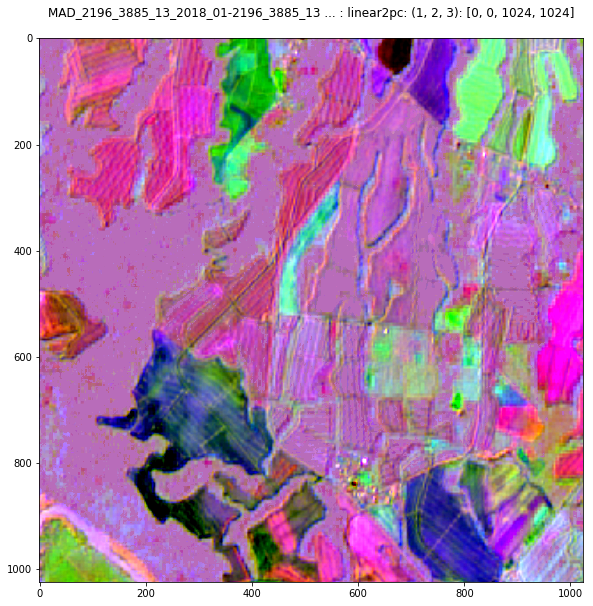

In [25]:
%run scripts/dispms -f imagery/dynearthnet/2196_3885_13/MAD_2196_3885_13_2018_01-2196_3885_13_2018_02_cmap.tif \
-e 3 -p [1,2,3]

### Run EM clustering on all 10 MADs  with 4 clusters (11th band is chisqr)

In [31]:
%run scripts/em -K 4 -p [1,2,3,4,5,6,7,8,9,10] imagery/dynearthnet/2196_3885_13/MAD_2196_3885_13_2018_01-2196_3885_13_2018_02.tif

--------------------------
     EM clustering
--------------------------
infile:   imagery/dynearthnet/2196_3885_13/MAD_2196_3885_13_2018_01-2196_3885_13_2018_02.tif
clusters: 4
T0:       0.500000
beta:     0.500000
scale:    2
running EM on 65536 pixel vectors
em iteration 0: dU: 0.982759 loglike: -103096.567146
em iteration 10: dU: 0.984419 loglike: -13324.845871
em iteration 20: dU: 0.941130 loglike: -10919.596595
em iteration 30: dU: 0.859653 loglike: -10220.971779
em iteration 40: dU: 0.543571 loglike: -10161.960411
em iteration 50: dU: 0.019011 loglike: -10149.660768
em iteration 60: dU: 0.003453 loglike: -10147.193967
em iteration 70: dU: 0.001266 loglike: -10146.432398
running EM on 262144 pixel vectors
em iteration 0: dU: 0.999970 loglike: -130972.213985
em iteration 10: dU: 0.001790 loglike: -36596.033266
running EM on 1048576 pixel vectors
em iteration 0: dU: 1.000000 loglike: -323373.386387
Cluster mean vectors
[[-7.62225926e-03  4.09002409e-04 -1.07043151e-01 -1.79083346e-

### Display the change map

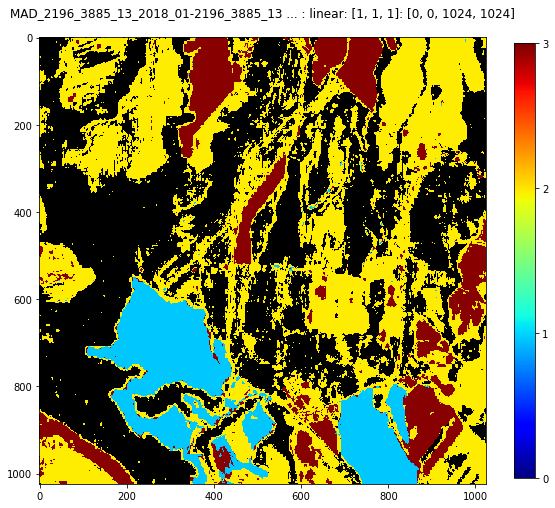

In [32]:
%run scripts/dispms -f imagery/dynearthnet/2196_3885_13/MAD_2196_3885_13_2018_01-2196_3885_13_2018_02_em.tif -c

###  3D  Plot of change/no change clusters

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.


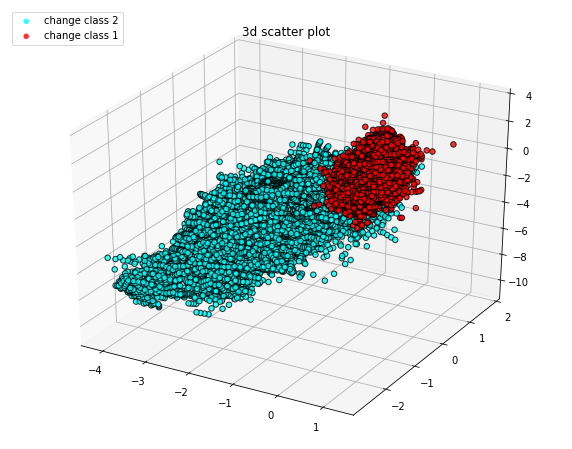

In [78]:
import numpy as np
from osgeo import gdal
from osgeo.gdalconst import GA_ReadOnly

def pltclusters(k1, k2):
    ''' Make a 3d plot of two em clusters '''
    # read the first 3 iMAD bands into array imad and classified image into array em
    gdal.AllRegister()
    imadfile = 'imagery/dynearthnet/2196_3885_13/MAD_2196_3885_13_2018_01-2196_3885_13_2018_02.tif'
    emfile = 'imagery/dynearthnet/2196_3885_13/MAD_2196_3885_13_2018_01-2196_3885_13_2018_02_em.tif'
    inDataset = gdal.Open(imadfile,GA_ReadOnly)
    cols = inDataset.RasterXSize
    rows = inDataset.RasterYSize    
    bands = inDataset.RasterCount
    imad = np.zeros((rows*cols,3))
    for b in range(3):
        band = inDataset.GetRasterBand(b+1)
        imad[:,b] = band.ReadAsArray(0,0,cols,rows).astype(float).ravel()
    inDataset = None    
    inDataset = gdal.Open(emfile,GA_ReadOnly)
    band = inDataset.GetRasterBand(1)
    em = band.ReadAsArray(0,0,cols,rows).ravel()
    inDataset = None
    # index two of the classes
    idx = np.where(em==k1)[0]
    g1 = imad[idx,:]
    idx = np.where(em==k2)[0]
    g2 = imad[idx,:]
    # make a 3d plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(1, 1, 1)
    ax = fig.gca(projection='3d')
    x, y, z = (g1[:,0],g1[:,1],g1[:,2])
    ax.scatter(x, y, z, alpha=0.8, c="cyan", edgecolors='none', s=30, label='change class %i'%k1)
    x, y, z = (g2[:,0],g2[:,1],g2[:,2])
    ax.scatter(x, y, z, alpha=0.8, c="red", edgecolors='none', s=30, label='change class %i'%k2)    

    plt.title('3d scatter plot')
    plt.legend(loc=2)
    plt.show()  
    
pltclusters(2,1)    